### Exercise 9
Load the MNIST dataset (introduced in Chapter 3) and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). <br/>

Train a **Random Forest** classifier on the dataset and **time how long it takes**, then **evaluate** the resulting model on the **test set**. <br/>

Next, use **PCA** to reduce the dataset’s **dimensionality**, with an **explained variance ratio of 95%**. Train a new Random Forest classifier on the reduced dataset and see **how long it takes**. Was training much faster? Next **evaluate** the classifier on the **test set**: how does it compare to the previous classifier?

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=10000, random_state=42)

In [5]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [6]:
import time
t0 = time.time()
rnd_clf.fit(X_train, y_train)
t1 = time.time()

In [7]:
print("Training time {:.2f}s".format(t1-t0))

Training time 111.92s


In [8]:
y_pred = rnd_clf.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.9674

In [11]:
# Use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

In [13]:
# Train a new Random Forest classifier on the reduced dataset and see how long it takes.
rnd_clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
t2 = time.time()
rnd_clf2.fit(X_train_reduced, y_train)
t3 = time.time()
print("Training time {:.2f}s".format(t3-t2))

Training time 238.16s


In [17]:
X_test_reduced = pca.transform(X_test)
y_pred = rnd_clf2.predict(X_test_reduced)

In [18]:
accuracy_score(y_pred, y_test)

0.9469

The performance droped slightly when reducing dimensionality, it also takes longer time. PCA here is not helpful: it slowed down training and reduced performance.

Let's try softmax regression.<br/>

The Logistic Regression model can be generalized to **support multiple classes** directly, without having to train and combine multiple binary classifiers (as discussed in Chapter 3). This is called Softmax Regression, or Multinomial Logistic Regression.

In [19]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)

lbfgs: supports l2 regulization. l2 = lambda\*sum(all_weights_in_model^2)

In [20]:
t0 = time.time()
log_clf.fit(X_train, y_train)
t1 = time.time()

/Users/jinlingxing/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
print("Training time {:.2f}s".format(t1-t0))

Training time 36.84s


In [23]:
y_pred = log_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9189

The softmax regression works not well on the test set. Will PCA help softmax regression?

In [25]:
log_clf2 = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)

In [27]:
t0 = time.time()
log_clf2.fit(X_train_reduced, y_train)
t1 = time.time()

/Users/jinlingxing/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
print("Training time {:.2f}s".format(t1-t0))

Training time 13.36s


In [29]:
y_pred = log_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9141

### Exercise 10
Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using
Matplotlib. You can use a scatterplot using 10 different colors to represent each image’s target class. <br/>

Alternatively, you can write colored digits at the location of each instance, or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits. Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.

t-SNE: t-distributed Stochastic Neighbor Embedding

In [2]:
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [3]:
np.random.seed(42)
m = 1000
idx = np.random.permutation(60000)[:m]
X = mnist['data'][idx]
y = mnist['target'][idx]

In [4]:
from sklearn.manifold import TSNE
t_sne = TSNE(n_components=2, random_state=42)
X_reduced = t_sne.fit_transform(X)

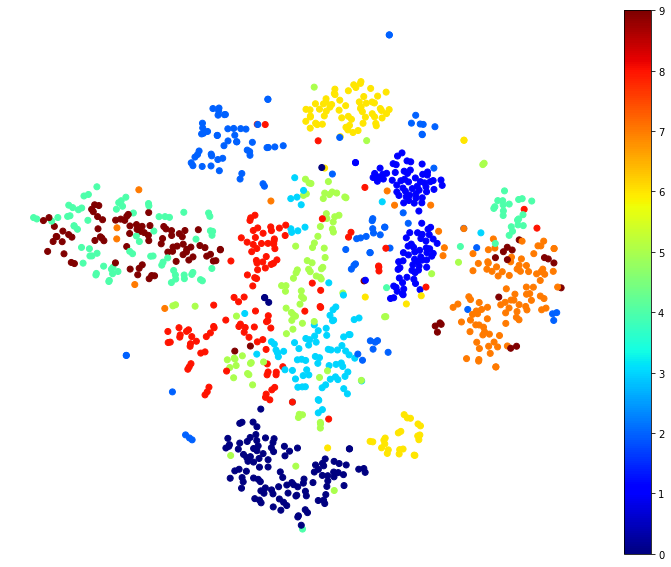

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='jet')
plt.axis('off')
plt.colorbar()
plt.show()

There are some numbers are easy to distinguish from the others, such as 0 and 7. Number 4 and 5 are hard to distinguish.

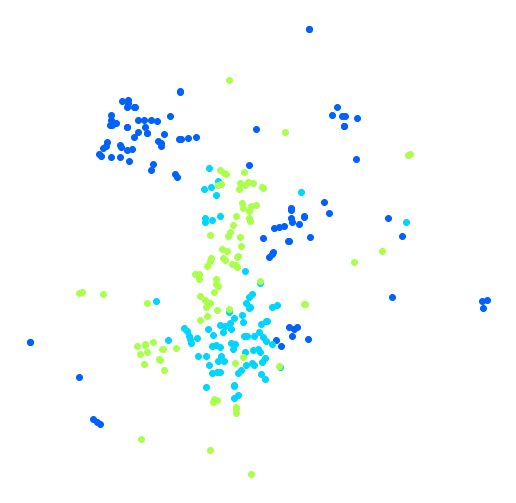

In [27]:
import matplotlib as mpl
plt.figure(figsize=(9, 9))
cmap = mpl.cm.get_cmap("jet")
for digit in (2,3,5):
    plt.scatter(X_reduced[y==digit, 0], X_reduced[y==digit, 1], c=[cmap(digit/9)])
plt.axis("off")
plt.show()

In [29]:
idx = (y==2) | (y==3) | (y==5)
X_subset = X[idx]
y_subset = y[idx]

tsne_subset = TSNE(n_components=2, random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

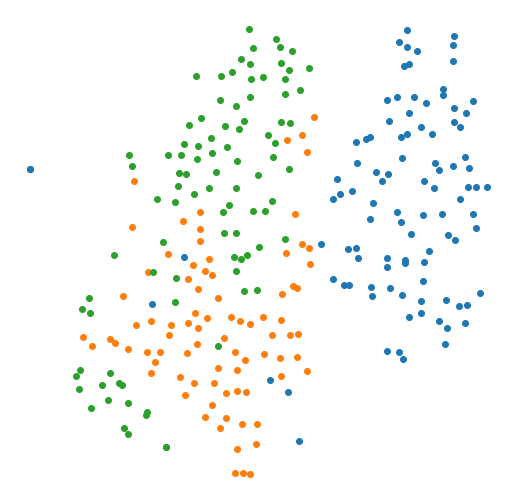

In [30]:
plt.figure(figsize=(9,9))
for digit in (2,3,5):
    plt.scatter(X_subset_reduced[y_subset==digit, 0], X_subset_reduced[y_subset==digit, 1])
plt.axis("off")
plt.show()

In [31]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

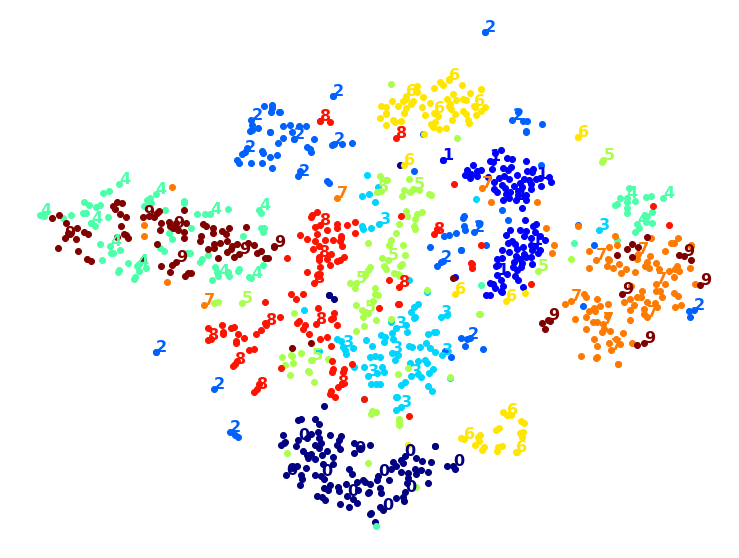

In [32]:
plot_digits(X_reduced, y)

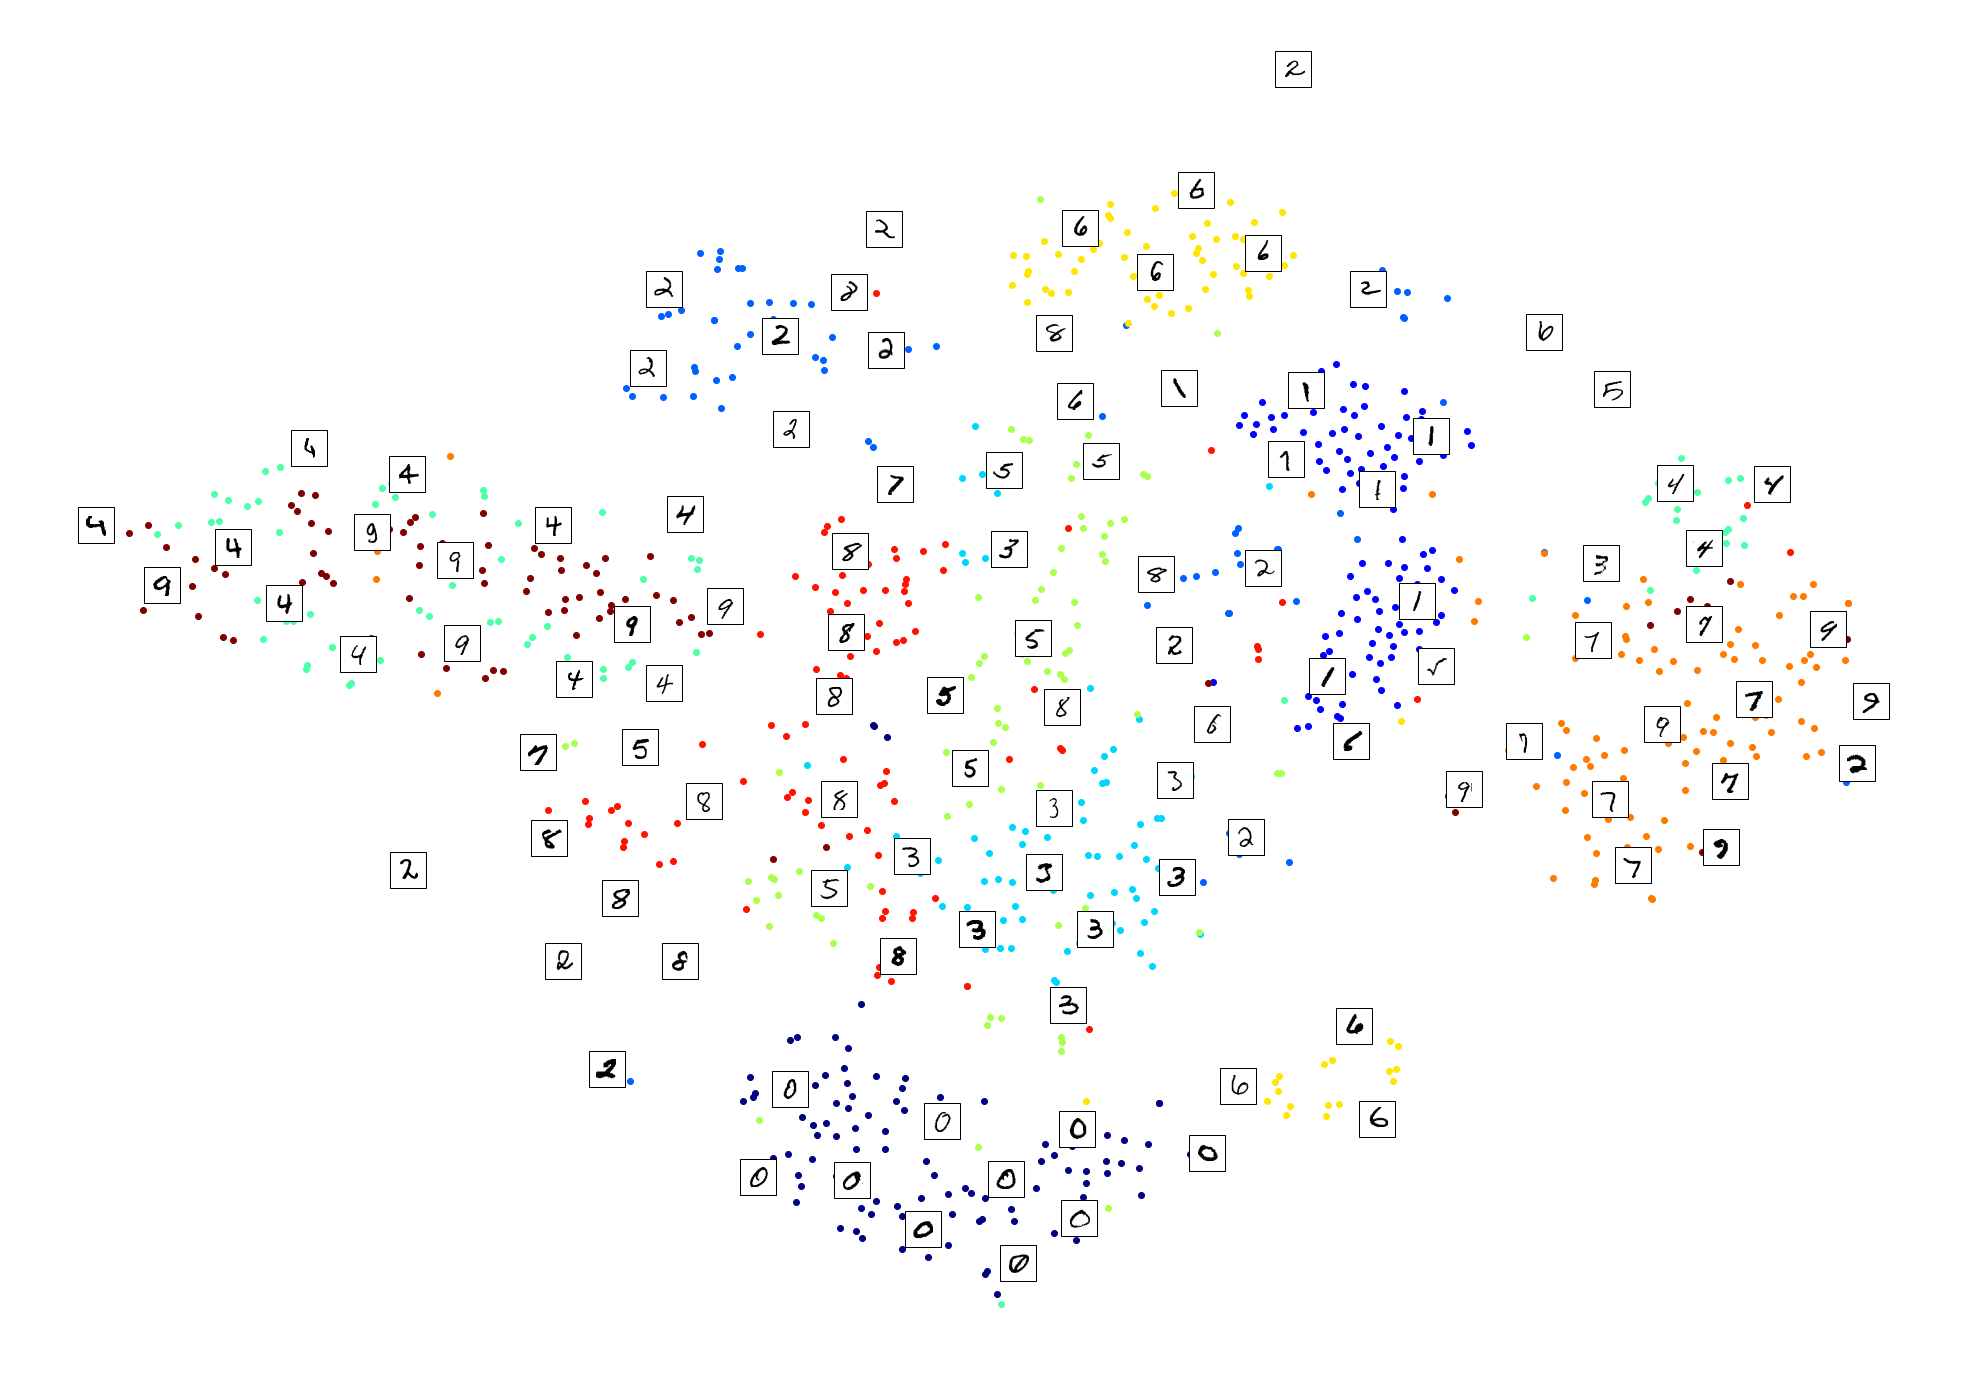

In [33]:
plot_digits(X_reduced, y, images=X, figsize=(35, 25))

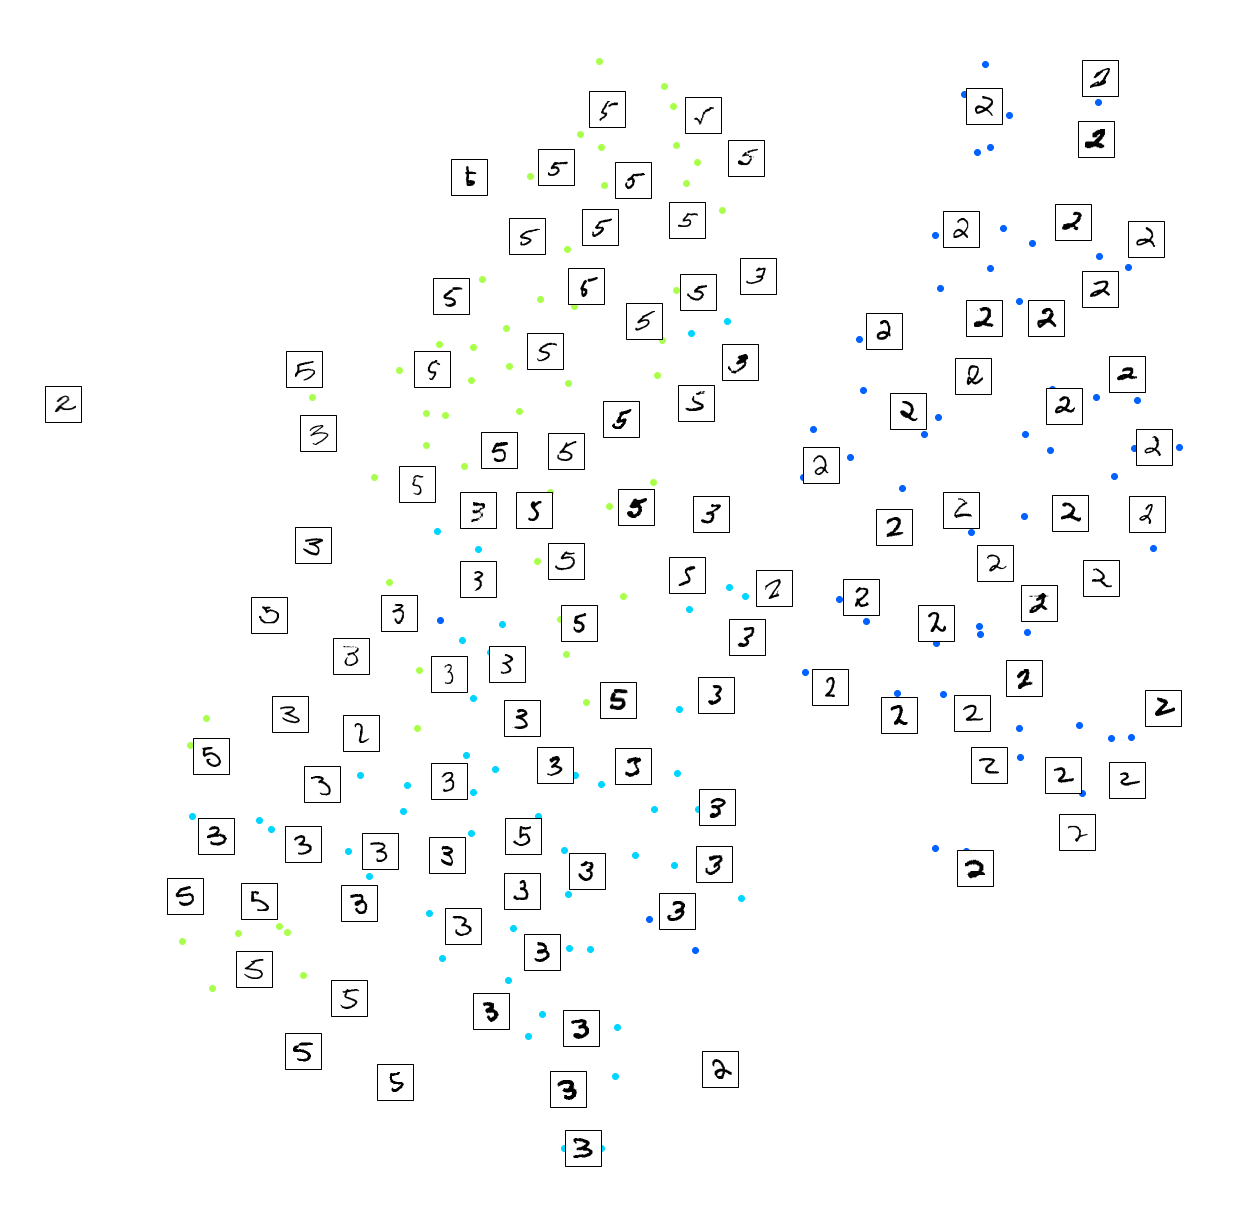

In [34]:
plot_digits(X_subset_reduced, y_subset, images=X_subset, figsize=(22, 22))